In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-whitegrid')

df = pd.read_csv('/home/ding/coding/DAND/investigate_dataset_project/movies_dataset/tmdb-movies.csv', engine='python')
df.head(2)


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [20]:
print(df.info())
df.shape
# print(type(df['cast'][1]))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

(10866, 21)

To do:
release date to date-time format
separate rows by genre, production companies, cast
find number of unique values
find number of null values
find number of duplicates
decide which columns to drop



In [21]:
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

10 more unique ID values than there are unique imdb id values because of Null values in imdb id column

In [22]:
dupes = df.duplicated()
df.query('@dupes == True')

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


In [23]:
df.drop_duplicates(inplace=True)
df.shape

(10865, 21)

In [24]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7929
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

Columns to be dropped include: homepage, tagline, imdb_id.

In [25]:
drop_columns = ['homepage', 'tagline', 'imdb_id']
df.drop(labels=drop_columns, axis=1, inplace=True)
df.shape

(10865, 18)

In [26]:
df.head(2)

,id,popularity,budget,revenue,original_title,cast,director,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [27]:
# df2 = pd.read_csv('/home/ding/coding/DAND/investigate_dataset_project/movies_dataset/tmdb_5000_movies.csv')
# df2.head()
# df2.shape
# df2.info()

In [28]:
df_cast = df.copy()
df_cast.cast = df_cast.cast.astype(str)

In [29]:
# df.cast.split('|')
df_cast = df.copy()
lst = df_cast.cast.apply(lambda x: x.split('|'))
lst[1][1]
# lst = df_cast['cast'][i].apply(lambda x: x.split('|'))

AttributeError: 'float' object has no attribute 'split'

In [72]:
# assess revenue over time
df.head(1)
year_group = df.groupby('release_year')['revenue'].mean()
# df['mav_rev'] = df.groupby('release_year')['revenue'].rolling(5).mean()
# df['mav_rev'] = year_group.rolling(window=5)
mv_av = year_group.rolling(5).mean()
mv_av.dropna(inplace=True)

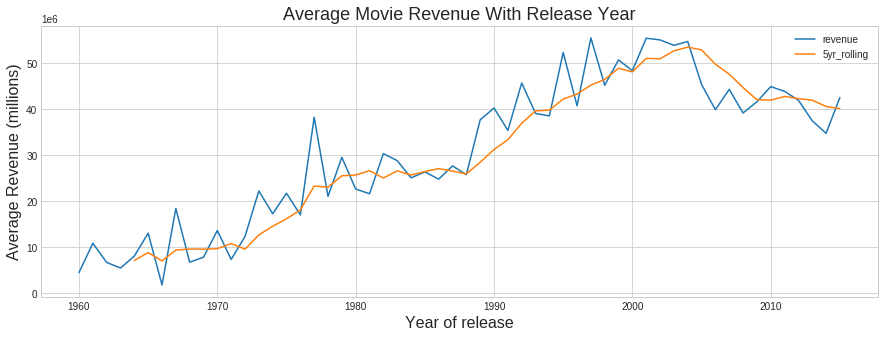

In [93]:
fig = plt.subplots(1,3, figsize=(15,5), sharex=True)
ax = plt.axes()
plt.plot(year_group);
plt.plot(mv_av)
plt.title("Average Movie Revenue With Release Year", fontsize=18)
plt.xlabel("Year of release", fontsize=16)
plt.ylabel("Average Revenue (millions)", fontsize=16)
ax.ticklabel_format(axis='y', style='sci', scilimits=(6,6))
leg_labels = ['revenue', '5yr_rolling']
plt.legend(leg_labels);

Why has the average revenue dropped?
Assess movie count
Assess movie budgets

In [120]:
counts = df.groupby('release_year')['revenue'].count()
av_budg = df.groupby('release_year')['budget'].mean()


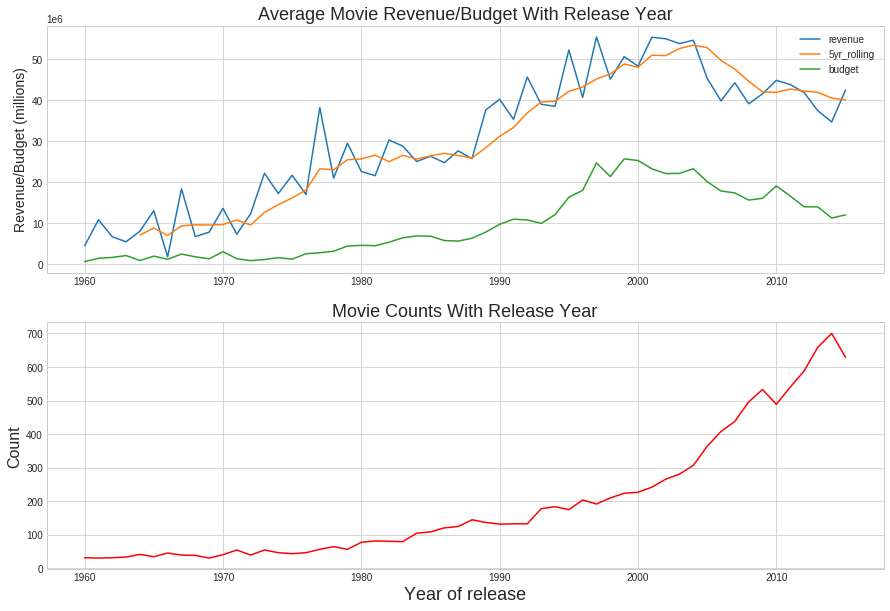

In [161]:
fig = plt.subplots(1,3, figsize=(15,10), sharex=True)
# plt.subplots_adjust(hspace=0.3)

plt.figure(1)
plt.subplot(211)
plt.plot(year_group)
plt.plot(mv_av)
plt.plot(av_budg)
plt.title("Average Movie Revenue/Budget With Release Year", fontsize=18)
# plt.xlabel("Year of release", fontsize=14)
plt.ylabel("Revenue/Budget (millions)", fontsize=14)
plt.ticklabel_format(axis='y', style='sci', scilimits=(6,6))
leg_labels = ['revenue', '5yr_rolling', 'budget']
plt.legend(leg_labels, loc=0);

# plt.figure(1)
# plt.subplot(312)
# plt.plot(av_budg)
# plt.title("Average Movie Budget With Release Year", fontsize=18)
# plt.xlabel("Year of release", fontsize=16)
# plt.ylabel("Average Budget (millions)", fontsize=16)
# plt.ticklabel_format(axis='y', style='sci', scilimits=(6,6))

plt.figure(1)
plt.subplot(212)
plt.plot(counts, 'r')
plt.title("Movie Counts With Release Year", fontsize=18)
plt.xlabel("Year of release", fontsize=18)
plt.ylabel("Count", fontsize=16)

plt.show()

**Deductions**
Average revenue rises and peaks around 2005 where there is a sharp drop in revenues. This coincides very closely with a sharp rise in the number of movies being produced each year as well as a reduction in the average movie budgets. There is a strong correlation between the average movie budget and average revenues. **Do we see this if we plot movie vs budget directly?**

0

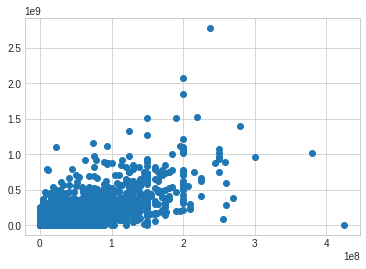

In [173]:
budget = df.budget
revenue = df.revenue

plt.scatter(x=budget, y=revenue)
# revenue.isnull().sum()
# budget.isnull().sum()
# df.shape